In [2]:
# Import Simulation Class
import sys
sys.path.append('..')  # Add parent directory to the system path
from ESR_STM_SpinSimulation import SpinSys
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Define the Spin System
Spins=[0.5]
S = SpinSys(Spins)
S.B=[0,0,0.484]
S.BTip=[1e-9,0,0]
S.tip='f'
S.TipPolarization=[0,0,0.5]
S.T=1
S.V_DC=-100
#print(S.D)

Basic Spin Calculations

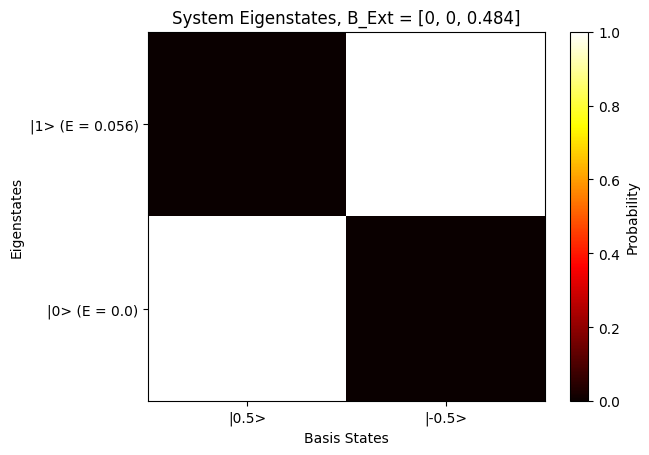

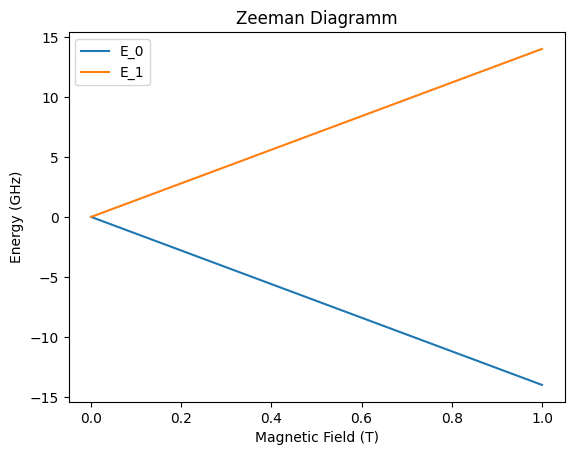

Found 1 potential transitions:
|0> -> |1>; f = 13.5475 GHz


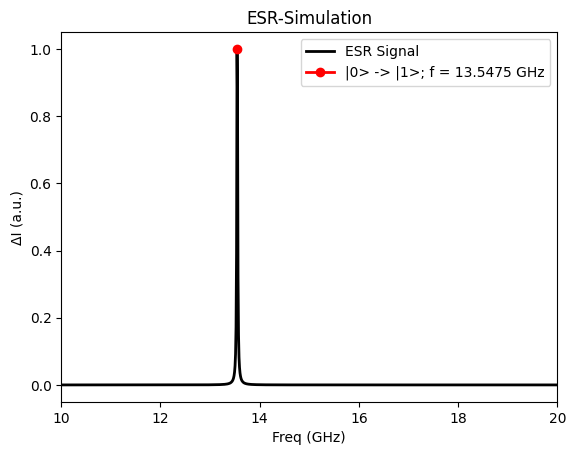

c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:716: RuntimeWarning: invalid value encountered in scalar divide
  RateIntegrals[i, j] = abs(delta_E / (np.exp(delta_E / (self.kB * self.T)) - 1))


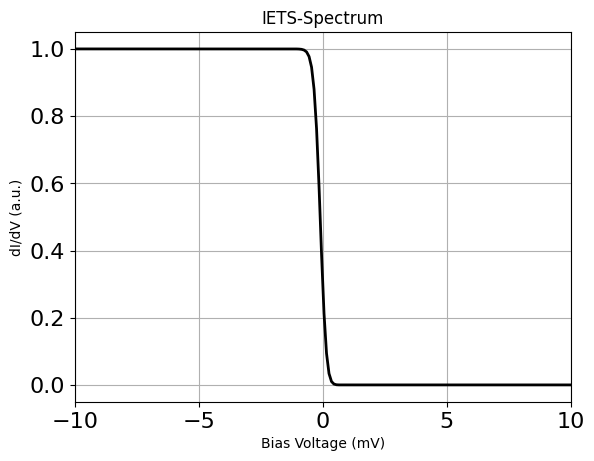

In [13]:
S.calcSpinOperators()
S.calcEigEnergies()
S.calcEigStates()
S.showEigenMatrix('p')
#S.plotEnergyVsSz()
S.plotZeemanDiagramm(Brange=[0,1],N=100)
S.calcESR_Benjamin()
S.calcIETS_2(Vrange=10,AllowPumping=False)
S.VDC=10

In [32]:
S.V_DC=10
S.calcRates()
#S.Rates
#S.Matrix
print(S.calcRateIntegrals(10,'ts'))
#S.Rates


[[10.          9.94397216]
 [10.05602784 10.        ]]


In [ ]:
np.log(2)

np.float64(-0.6931471805599453)

### Calculating the Populations for Given Parameters

In [28]:
# Setting the tunneling Parameters
S.B=[0,0,0.5]
S.ReadoutSpin = 0
S.G_ss = [1]
S.G = 1e-4
S.V_DC = -100
S.T = 0.5
S.TipPolarization = [0, 0, -0.4]
S.U = [0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering
S.calcEigEnergies()
S.calcEigStates()
S.calcRates()
S.calcMagnetization()

print(f"VDC: {S.V_DC:.0f}mV")
print(f"------------")
print(f"p0: {S.Populations[0] * 100:.2f}%")
print(f"p1: {S.Populations[1] * 100:.2f}%")
print(S.G/S.G_ss[0])
print(S.Mag)

VDC: -100mV
------------
p0: 77.74%
p1: 22.26%
0.0001
0.5548159035171478


c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:712: RuntimeWarning: overflow encountered in exp
  RateIntegrals[i, j] = abs((delta_E - V_DC) / (np.exp((delta_E - V_DC) / (self.kB * self.T)) - 1))
c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:716: RuntimeWarning: invalid value encountered in scalar divide
  RateIntegrals[i, j] = abs(delta_E / (np.exp(delta_E / (self.kB * self.T)) - 1))


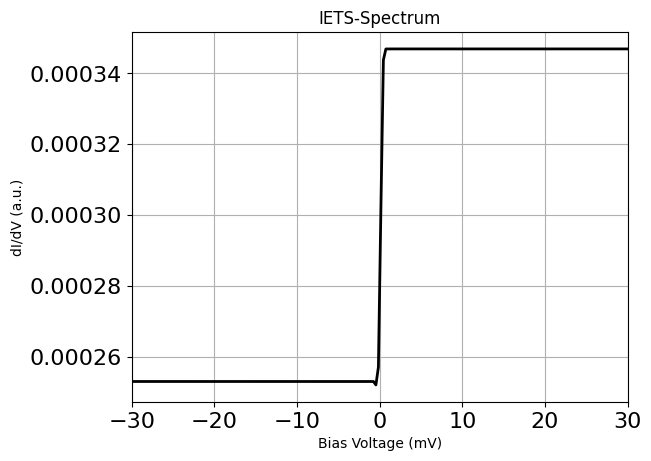

(array([-30.        , -29.69849246, -29.39698492, -29.09547739,
        -28.79396985, -28.49246231, -28.19095477, -27.88944724,
        -27.5879397 , -27.28643216, -26.98492462, -26.68341709,
        -26.38190955, -26.08040201, -25.77889447, -25.47738693,
        -25.1758794 , -24.87437186, -24.57286432, -24.27135678,
        -23.96984925, -23.66834171, -23.36683417, -23.06532663,
        -22.7638191 , -22.46231156, -22.16080402, -21.85929648,
        -21.55778894, -21.25628141, -20.95477387, -20.65326633,
        -20.35175879, -20.05025126, -19.74874372, -19.44723618,
        -19.14572864, -18.84422111, -18.54271357, -18.24120603,
        -17.93969849, -17.63819095, -17.33668342, -17.03517588,
        -16.73366834, -16.4321608 , -16.13065327, -15.82914573,
        -15.52763819, -15.22613065, -14.92462312, -14.62311558,
        -14.32160804, -14.0201005 , -13.71859296, -13.41708543,
        -13.11557789, -12.81407035, -12.51256281, -12.21105528,
        -11.90954774, -11.6080402 , -11.

In [29]:
S.calcIETS(AllowPumping=False,norm=False)

### Pumping with a Voltage

In [ ]:

# Setting the tunneling Parameters
S.B=[0,0,0.5]
S.calcEigEnergies()
S.calcEigStates()
S.G_ss = [1]
S.G = 1e-3
S.V_DC = -100
S.T = 0.5
S.TipPolarization = [0, 0, 0.8]
S.U = [0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering
S.calcRates()

# Initialize the arrays
N=201
V_range=np.linspace(-100,100,N)
P0=np.zeros(N)
P1=np.zeros(N)
M=np.zeros(N)
thermal_diff=np.zeros(N)
T_eff=np.zeros(N)

# Calculating 
for i in range(len(V_range)):
    S.V_DC = V_range[i]
    S.calcRates()
    S.calcMagnetization()
    #M[i] = (S.Populations[0] - S.Populations[1])
    M[i] = S.Mag
    thermal_diff[i] = -(S.p0[0] - S.Populations[0])
    T_eff[i] = S.E_All[1]/(S.kB*np.log(S.Populations[0]/S.Populations[1]))
    P0[i] = S.Populations[0]
    P1[i] = S.Populations[1]


# Plotting the Magnetization 
plt.figure(figsize=(7, 5))
plt.plot(V_range, M, color='b')
plt.ylim([-1, 1])
plt.title(f'Magnetization vs V_DC \n Polarization={S.TipPolarization[2]}, T={S.T}K, R=1e{np.log10(S.G/S.G_ss[0])}')
plt.xlabel('V_DC (mV)')
plt.ylabel('Magnetization (norm.)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plotting the Difference in the thermal populations
plt.figure(figsize=(7, 5))
plt.plot(V_range, thermal_diff, color='k')
#plt.ylim([-1, 1])
plt.title(f'Difference from Thermal Equilibrium vs V_DC \n Polarization={S.TipPolarization[2]}, T={S.T}K, R=1e{np.log10(S.G/S.G_ss[0])}')
plt.xlabel('V_DC (mV)')
plt.ylabel(r'$\Delta p$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plotting the Effective Temperature
plt.figure(figsize=(7, 5))
plt.plot(V_range, np.abs(T_eff), color='r')
#plt.ylim([-1, 1])
plt.title(f'Spin-Temperature vs V_DC \n Polarization={S.TipPolarization[2]}, T={S.T}K, R=1e{np.log10(S.G/S.G_ss[0])}')
plt.xlabel('V_DC (mV)')
plt.ylabel('T_eff (K)')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plotting the Populations
colors = plt.cm.jet(np.linspace(0, 1, S.dimensionOfMatrix))[:, :3]
plt.figure(figsize=(7, 5))
plt.plot(V_range, P0, color=colors[0], label=f'p0')
plt.plot(V_range, P1, color=colors[1], label=f'p1')
#plt.plot(V_range, np.abs(T_eff), color='k')
#plt.plot(V_range, np.abs(T_eff), color='r')
plt.ylim([0, 1])
plt.title(f'Populations vs V_DC \n Polarization={S.TipPolarization[2]}, T={S.T}K, R=1e{np.log10(S.G/S.G_ss[0])}')
plt.xlabel('V_DC (mV)')
plt.ylabel('p')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()
# Find the index of the maximum P0
max_P0_index = np.argmax(P0)

# Get the corresponding value of V_range
max_P0_V_range = V_range[max_P0_index]

print(f"Index of maximum P0: {max_P0_index}")
print(f"Corresponding value of V_range: {max_P0_V_range}")

### Effect of the Energy Splitting

In [ ]:
# Setting the tunneling Parameters
S.G_ss = [1]
S.G = 1e3
S.V_DC = -100
S.T = 0.5
S.TipPolarization = [0, 0, 0.8]
S.U = [0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

S.calcRates()

#print(f"Polarization: {S.TipPolarization[2]:.1f}")
print(f"VDC: {S.V_DC:.0f}mV")
print(f"------------")
print(f"p0: {S.Populations[0] * 100:.2f}%")
print(f"p1: {S.Populations[1] * 100:.2f}%")
print(S.G/S.G_ss[0])
S.calcIETS(Vrange=100,AllowPumping=True);

### Magnetization vs Conductance Ratio 

In [ ]:
# Plot the Magnetization as a function of the conductance ratio 

# Setting the tunneling Parameters
S.G_ss = [1]
S.V_DC = -100
S.T = 0.5
#S.TipPolarization = [0, 0, 0.8]
S.U = [0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Initializing the Arrays
N=200
R_exponent=np.linspace(-6,6,N)
polarizations = [0.8]
M = np.zeros((len(polarizations),len(R_exponent)))
thermal_diff = np.zeros((len(polarizations),len(R_exponent)))

# Get the Spectral colormap


# Generate a list of n colors from the colormap
cmap = plt.get_cmap('Spectral_r')
cmap2 = plt.get_cmap('Blues')
#color_list = [cmap(i / (len(polarizations) - 1)) for i in range(len(polarizations))]
#color_list_blues = [cmap2(i / (len(polarizations) - 1)) for i in range(len(polarizations))]

plt.figure(figsize=(10, 5))
for i, pol in enumerate(polarizations):
    S.TipPolarization = [0, 0, pol]
    for g in range(len(R_exponent)):
        S.G = 10**R_exponent[g]*S.G_ss[0]
        S.calcRates()
        M[i,g] = (S.Populations[0] - S.Populations[1])
        thermal_diff[i,g] = -(S.p0[0] - S.Populations[0])
    

# Plot the Magnetization over the conductance Ratio
plt.figure(figsize=(10, 5))
for i in range(len(polarizations)):
    plt.plot(R_exponent, M[i], label=f'Polarization = {polarizations[i]:.1f}', color='b')
plt.ylim([-1, 1])
plt.title(f'Magnetization vs Conductance Ratio \n V_DC={S.V_DC}mV, T={S.T}K')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel('Magnetization (norm.)')
plt.legend()
plt.grid()
plt.show()

# Plotting the Difference of thermal Population for different Temperatures
plt.figure(figsize=(10, 5))
for i in range(len(polarizations)):
    plt.plot(R_exponent, thermal_diff[i], label=f'Polarization = {polarizations[i]:.2f}', color='g')
    #plt.fill_between(R_exponent, thermal_diff[i], 0, color=color_list[i], alpha=0.1)
plt.title(f'Difference from Thermal Equilibrium vs Conductance Ratio \n V_DC={S.V_DC}mV, T={S.T}K')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel(r'$\Delta p$')
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

### Magnetization for Different Tip Polarizations

In [ ]:
# Plot the Magnetization as a function of the conductance ratio at -100mV, for several tip polarizations

# Setting the tunneling Parameters
S.G_ss = [1]
S.V_DC = -100
S.T = 0.2
#S.TipPolarization = [0, 0, 0.8]
S.U = [0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Initializing the Arrays
N=200
R_exponent=np.linspace(-6,6,N)
polarizations = np.linspace(-0.9,-1,11)
M = np.zeros((len(polarizations),len(R_exponent)))
thermal_diff = np.zeros((len(polarizations),len(R_exponent)))

# Get the Spectral colormap


# Generate a list of n colors from the colormap
cmap = plt.get_cmap('Spectral_r')
cmap2 = plt.get_cmap('Blues')
color_list = [cmap(i / (len(polarizations) - 1)) for i in range(len(polarizations))]
color_list_blues = [cmap2(i / (len(polarizations) - 1)) for i in range(len(polarizations))]

plt.figure(figsize=(10, 5))
for i, pol in enumerate(polarizations):
    S.TipPolarization = [0, 0, pol]
    for g in range(len(R_exponent)):
        S.G = 10**R_exponent[g]*S.G_ss[0]
        S.calcRates()
        M[i,g] = (S.Populations[0] - S.Populations[1])
        thermal_diff[i,g] = -(S.p0[0] - S.Populations[0])
    

# Plot the Magnetiuation over the conductance Ratio
plt.figure(figsize=(10, 5))
for i in range(len(polarizations)):
    plt.plot(R_exponent, M[i], label=f'Polarization = {polarizations[i]:.1f}', color=color_list[i])
plt.ylim([-1, 1])
plt.title(f'Magnetization vs Conductance Ratio \n V_DC={S.V_DC}mV, T={S.T}K')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel('Magnetization (norm.)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plotting the Difference of thermal Population for different Temperatures
plt.figure(figsize=(10, 5))
for i in range(len(polarizations)):
    plt.plot(R_exponent, thermal_diff[i], label=f'Polarization = {polarizations[i]:.2f}', color=color_list_blues[i])
    #plt.fill_between(R_exponent, thermal_diff[i], 0, color=color_list[i], alpha=0.1)
plt.title(f'Difference from Thermal Equilibrium vs Conductance Ratio \n V_DC={S.V_DC}mV, T={S.T}K')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel(r'$\Delta p$')
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

### Temperature Dependence

In [ ]:
# Calculate the Magnetization and Difference from thermal population as a function of the conductance ratio
# Voltage and Tip-Polarization are fixed

# Setting the tunneling Parameters
S.G_ss = [1]
S.V_DC = -100
#S.T = 0.5
S.TipPolarization = [0, 0, 0.6]
S.U = [0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Initializing the Arrays
N=200
R_exponent=np.linspace(-6,6,N)
temperatures = [0.01,0.1,0.5,1,2,5,10]
M = np.zeros((len(temperatures),len(R_exponent)))
thermal_diff = np.zeros((len(temperatures),len(R_exponent)))

# Create Nice colors for the different Temperatures
colors = plt.cm.coolwarm(np.linspace(0, 1, len(temperatures)))[:, :3]

# Calculating the Magnetization and Difference from thermal population
for i in range(len(temperatures)):
    S.T = temperatures[i]
    for g in range(len(R_exponent)):
        S.G = 10**R_exponent[g]*S.G_ss[0]
        S.calcRates()
        M[i,g] = (S.Populations[0] - S.Populations[1])
        thermal_diff[i,g] = -(S.p0[0] - S.Populations[0])
        

# Plotting the Magnetization for different Temperatures
plt.figure(figsize=(15, 5))
for i in range(len(temperatures)):
    plt.plot(R_exponent, M[i,:], color=colors[i,:], label=f'T={temperatures[i]}K')
plt.ylim([-1, 1])
plt.title(f'Magnetization vs Conductance Ratio \n V_DC = {S.V_DC}mV, Tip Polarization = {S.TipPolarization[2]}')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel('Magnetization (norm.)')
plt.legend()
plt.grid()
plt.show()

# Plotting the Difference of thermal Population for different Temperatures
plt.figure(figsize=(15, 5))
for i in range(len(temperatures)):
    plt.plot(R_exponent, thermal_diff[i,:], color=colors[i,:], label=f'T={temperatures[i]}K')
plt.title(f'Difference from Thermal Equilibrium vs Conductance Ratio \n V_DC = {S.V_DC}mV, Tip Polarization = {S.TipPolarization[2]}')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel(r'$\Delta p$')
plt.legend()
plt.grid()
plt.show()


### Heat Map

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

# Setting the tunneling Parameters
S.G_ss = [1]
#S.V_DC = -100
S.T = 0.5
S.TipPolarization = [0, 0.8, 0.0]
S.U = [0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Define the range for the conductance ratio exponent
N=51;
R_exponent = np.linspace(-6, 6, N)
V_DC_range = np.linspace(-100, 100, N)
M = np.zeros((len(V_DC_range), len(R_exponent)))
thermal_diff = np.zeros((len(V_DC_range), len(R_exponent)))
T_eff = np.zeros((len(V_DC_range), len(R_exponent)))

# Loop over the DC voltage range and conductance ratio to calculate the population differences
for v_idx in range(len(V_DC_range)):
    S.V_DC = V_DC_range[v_idx]  # Set the DC voltage
    for r_idx in range(len(R_exponent)):
        S.G = 10**R_exponent[r_idx]*S.G_ss[0]  # Set the conductance ratio
        S.calcRates()  # Calculate the rates
        M[r_idx, v_idx] = S.Populations[0] - S.Populations[1]  # Calculate the population difference
        thermal_diff[r_idx, v_idx] = -(S.p0[0] - S.Populations[0])  # Calculate the population difference of the ground state from thermal equilibrium
        T_eff[r_idx, v_idx] = np.abs(S.E_All[1]/(S.kB*np.log(S.Populations[0]/S.Populations[1])))

# Custom colormap
tmin, t0, tmax = sorted([T_eff.min(), S.T, T_eff.max()])
pmin, p0, pmax = sorted([thermal_diff.min(), 0, thermal_diff.max()])
#mmin, m0, mmax = sorted([M.min(), (S.p0[0]-S.p0[1]), M.max()])
mmin, m0, mmax = sorted([-1, 0, 1])
norm_th = TwoSlopeNorm(vmin=pmin, vcenter=p0, vmax=pmax)
norm_m = TwoSlopeNorm(vmin=mmin, vcenter=m0, vmax=mmax)
norm_T = TwoSlopeNorm(vmin=tmin, vcenter=t0, vmax=tmax)


# Plot the colormap of the Difference from Thermal Equilibrium
plt.figure(figsize=(10, 7))
plt.contourf(V_DC_range, R_exponent, thermal_diff, cmap='coolwarm_r', levels=256*4,norm=norm_th)
plt.colorbar(label=r'$\Delta p$')
plt.title(f'Population Difference from Thermal Equilibrium \n T= {S.T}K and Tip Polarization = {S.TipPolarization[2]}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

# Plot the colormap of the Difference from Thermal Equilibrium
plt.figure(figsize=(10, 7))
contour=plt.contourf(V_DC_range, R_exponent, M, cmap='Spectral', levels=256*4,norm=Normalize(vmin=-1, vmax=1))
# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('M (norm.)')
#cbar.set_ticks(np.linspace(-1, 1, 11))
plt.title(f'Magnetization \n T= {S.T}K and Tip Polarization = {S.TipPolarization}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

# Plot the colormap of the Effective Spin Temperature
plt.figure(figsize=(10, 7))
plt.contourf(R_exponent, V_DC_range, M, cmap='coolwarm', levels=256*4,norm=LogNorm())
plt.colorbar(label='T_eff (K)')
plt.title(f'Effective Spin Temperature \n T= {S.T}K and Tip Polarization = {S.TipPolarization[2]}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

In [ ]:
S.E_All

In [ ]:

np.log10(1e6)